In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split

### Feature Selection Using Lasso

In [59]:
df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [60]:
x = df.drop(['Outcome'],axis=1)
y = df['Outcome']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [61]:
y_test.shape

(154,)

In [64]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)

x_train_scaled = pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled  = pd.DataFrame(x_test_scaled, columns=x_train.columns)

In [65]:
x_test_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.562115,-1.067076,0.253321,-0.077817,-0.241927,-0.359596,-0.724138,-0.966767
1,-0.562115,0.222100,0.766145,-1.252218,-0.683325,-0.487547,-0.562536,-0.535688
2,-1.154120,-0.626869,0.458451,1.220206,0.066219,0.344134,-0.697694,-0.794335
3,-1.154120,0.033441,0.150757,-1.252218,-0.683325,0.574446,-0.638930,1.619703
4,-0.858118,0.693750,0.663580,1.591069,0.815763,1.828365,-0.412687,1.102409
...,...,...,...,...,...,...,...,...
149,-0.562115,-0.501096,-0.669761,0.416668,0.690839,-0.359596,-0.145308,-0.966767
150,-0.562115,-1.224292,-0.156937,0.169425,-0.266911,0.049847,0.063306,-0.966767
151,-1.154120,0.316430,0.458451,-1.252218,-0.683325,0.075437,-0.242270,-1.052982
152,0.325892,0.473647,1.996921,-1.252218,-0.683325,2.173832,-0.730015,0.326468


In [66]:
from sklearn.linear_model import Lasso

In [67]:
model = Lasso(alpha=0.1)
model.fit(x_train_scaled,y_train)

Lasso(alpha=0.1)

In [68]:
y_pred = model.predict(x_test_scaled)

In [69]:
model.coef_

array([0.        , 0.1305747 , 0.        , 0.        , 0.        ,
       0.00962867, 0.        , 0.        ])

In [72]:
series = pd.Series(np.abs(model.coef_),index=x_train.columns)
series

Pregnancies                 0.000000
Glucose                     0.130575
BloodPressure               0.000000
SkinThickness               0.000000
Insulin                     0.000000
BMI                         0.009629
DiabetesPedigreeFunction    0.000000
Age                         0.000000
dtype: float64

<AxesSubplot:>

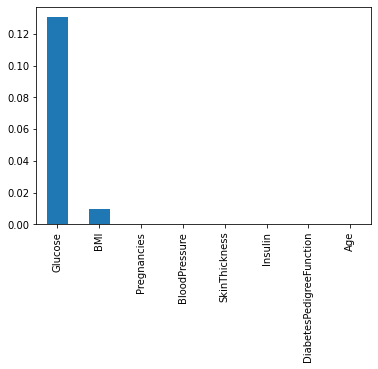

In [82]:
import matplotlib.pyplot as plt
series.sort_values(ascending=False).plot(kind='bar')

#### In above cell we can see which coefficient(feature) plays most important role in data

### Feature Selection Using Decision Tree
- We are using same data that we used in above function

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [94]:
tree = DecisionTreeClassifier()
tree.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [95]:
pred_using_tree  = tree.predict(x_test)
r2_score(y_test,pred_using_tree)

-0.44424057084607527

In [96]:
tree.feature_importances_

array([0.05749716, 0.32146386, 0.0670512 , 0.05405022, 0.05203239,
       0.24753415, 0.10704545, 0.09332557])

<AxesSubplot:>

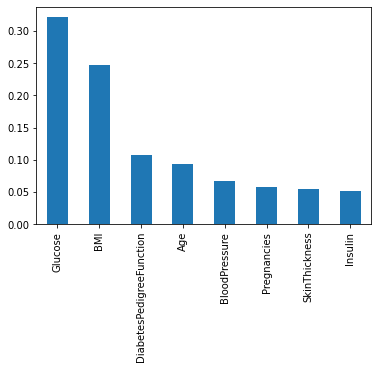

In [97]:
series = pd.Series(tree.feature_importances_, index=x_train.columns)
series.sort_values(ascending=False).plot(kind='bar')

In [99]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [100]:
rf_model.feature_importances_

array([0.08947238, 0.26409329, 0.08543987, 0.06922388, 0.07577684,
       0.15762689, 0.12732228, 0.13104456])

<AxesSubplot:>

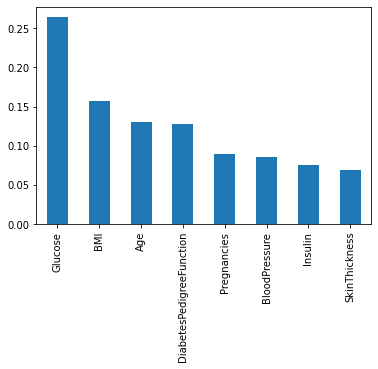

In [101]:
series = pd.Series(rf_model.feature_importances_,index=x_train.columns)
series.sort_values(ascending=False).plot(kind='bar')

#### In this way we can use trees to check features importance

### Feature Selection Using SelectFromModel
- We use any model with this technique, Here i am using Decision Tree clasifier, Only used with the models that perform feature importance mean gives coefficients

In [102]:
dt_model = DecisionTreeClassifier()

In [103]:
from sklearn.feature_selection import SelectFromModel

In [106]:
sfm = SelectFromModel(dt_model,threshold='mean')
sfm.fit(x_train,y_train)

SelectFromModel(estimator=DecisionTreeClassifier(), threshold='mean')

In [108]:
sfm.get_support(indices=True)

array([1, 5], dtype=int64)

In [116]:
sfm.feature_names_in_[sfm.get_support()]

array(['Glucose', 'BMI'], dtype=object)

#### These are the important features according to SelectFromModel

In [118]:
pd.DataFrame(sfm.transform(x_train),columns=sfm.feature_names_in_[sfm.get_support()])

,Glucose,BMI
0,124.0,27.8
1,95.0,35.0
2,94.0,43.5
3,184.0,35.5
4,73.0,21.1
...,...,...
609,77.0,33.3
610,124.0,28.7
611,125.0,28.9
612,116.0,26.3


### Featue Selection using
#### Recursive Feature Selection
- In this technique we keep dropping features that is less important
        - Here we are using iris dataset

In [126]:
iris = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')

In [128]:
x = iris.drop('species',axis=1)
y = iris['species']

In [130]:
random = RandomForestClassifier()
random.fit(x,y)

RandomForestClassifier()

In [135]:
random.feature_importances_

array([0.09007133, 0.02312741, 0.42691596, 0.45988531])

#### Here we can see that first feature that is sepal_length is less important so we dropping it

In [137]:
x = x.drop('sepal_length',axis=1)

In [138]:
random.fit(x,y)

RandomForestClassifier()

In [139]:
random.feature_importances_

array([0.13096627, 0.45262641, 0.41640731])

#### Sepal_width is less important

In [142]:
x = x.drop('sepal_width',axis=1)

In [143]:
random.fit(x,y)

RandomForestClassifier()

In [144]:
random.feature_importances_

array([0.52766632, 0.47233368])

#### petal width is less impotant

In [147]:
x

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [149]:
x = x.drop('petal_width',axis=1)

In [150]:
random.fit(x,y)

RandomForestClassifier()

In [151]:
random.feature_importances_

array([1.])

In [153]:
x.head()

,petal_length
0,1.4
1,1.4
2,1.3
3,1.5
4,1.4


### Sklearn RFE

In [155]:
iris = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')
x = iris.drop('species',axis=1)
y = iris['species']

In [159]:
from sklearn.feature_selection import RFE

#### We are using random forest classifier from above code

In [162]:
rfe = RFE(estimator=random,n_features_to_select=1)
rfe.fit(x,y)

RFE(estimator=RandomForestClassifier(), n_features_to_select=1)

In [166]:
rfe.feature_names_in_[rfe.get_support()]

array(['petal_width'], dtype=object)

In [175]:
rank = rfe.ranking_
rank

array([3, 4, 2, 1])

In [183]:
# Tells us feature rankings
for i,feature in enumerate(x.columns):
    print(feature,rank[i])
#     print(rank[i])

sepal_length 3
sepal_width 4
petal_length 2
petal_width 1


### Feature Selection Using Mutual Info

In [190]:
from sklearn.datasets import load_iris
iris = load_iris()
x = iris.data
y = iris.target

In [192]:
# In the same way we can use regressor too
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(x,y)
mi

array([0.48760386, 0.23354483, 0.97802976, 0.98135696])

In [196]:
for i, feature in enumerate(mi):
    print(f'feature{i}:  {feature }')

feature0:  0.487603858631398
feature1:  0.2335448332780905
feature2:  0.9780297594627403
feature3:  0.9813569582721247


### We can even choose k_best of our own choice using SelectKbest function

In [203]:
from sklearn.feature_selection import SelectKBest

best_features = SelectKBest(mutual_info_classif,k=2)
best_features

SelectKBest(k=2,
            score_func=<function mutual_info_classif at 0x0000019508D17910>)

In [205]:
best_features.fit(x,y)

SelectKBest(k=2,
            score_func=<function mutual_info_classif at 0x0000019508D17910>)

In [208]:
best_features.get_support(indices=True)

array([2, 3], dtype=int64)

In [209]:
best_features.get_feature_names_out()

array(['x2', 'x3'], dtype=object)

In [215]:
print(iris.feature_names)
print(best_features.get_feature_names_out())

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['x2' 'x3']
